In [1]:
import sympy
sympy.init_printing()
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, './code')

from gauss_legendre import gauss_legendre
from evaluate_functional import evaluate_functional

# pendulum with spring 

In [2]:
# generalized configuration coordinates
r = sympy.Symbol('r')
phi = sympy.Symbol('phi')

# parameters
from sympy.abc import m, k, l, g
params = {m: 0.1, k: 3.0, l: 0.5, g: 9.81}

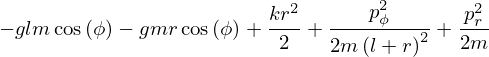

In [3]:
# generalized velocities
rdot = sympy.Symbol('\dot{r}')
phidot = sympy.Symbol('\dot{\phi}')

# kinetic energy
T = sympy.Rational(1,2) * m * (rdot**2 + ((l+r)*phidot)**2)

# conjugate momenta
p_r = sympy.Symbol('p_r')
p_phi = sympy.Symbol('p_phi')

# Legendre transformation
lt_r = sympy.solve(T.diff(rdot) - p_r, rdot)[0]
lt_phi = sympy.solve(T.diff(phidot) - p_phi, phidot)[0]

# potential energy
V = m * g * (-(l+r) * sympy.cos(phi)) + sympy.Rational(1,2) * k * r**2

# Hamiltonian
H = T.subs([(rdot, lt_r), (phidot, lt_phi)]) + V
H = H.simplify()
display(H)

In [4]:
# state vector
x = [phi, r, p_phi, p_r]

# initial conditions
r0 = (params[m] * params[g]) / params[k] 
x_0 = np.array([0.0, r0, 0.1, 0.0], dtype=float)

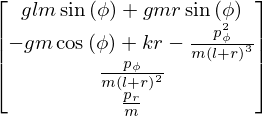

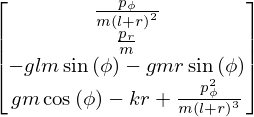

In [38]:
# Poisson matrix
J = sympy.Matrix([[0, 0, 1, 0],
                  [0, 0, 0, 1],
                  [-1, 0, 0, 0],
                  [0, -1, 0, 0]
                 ])

dH = sympy.Matrix([H.diff(co) for co in x])
display(dH)
F = J @ dH
display(F)

# final time, time step, approximation order
t_f = 50.0
h = 1e-2
s = 2

In [39]:
%time time, solution = gauss_legendre(x, F, x_0, t_f, h, s, tol=1e-12, params=params)

CPU times: user 1.46 s, sys: 5.94 ms, total: 1.47 s
Wall time: 1.47 s


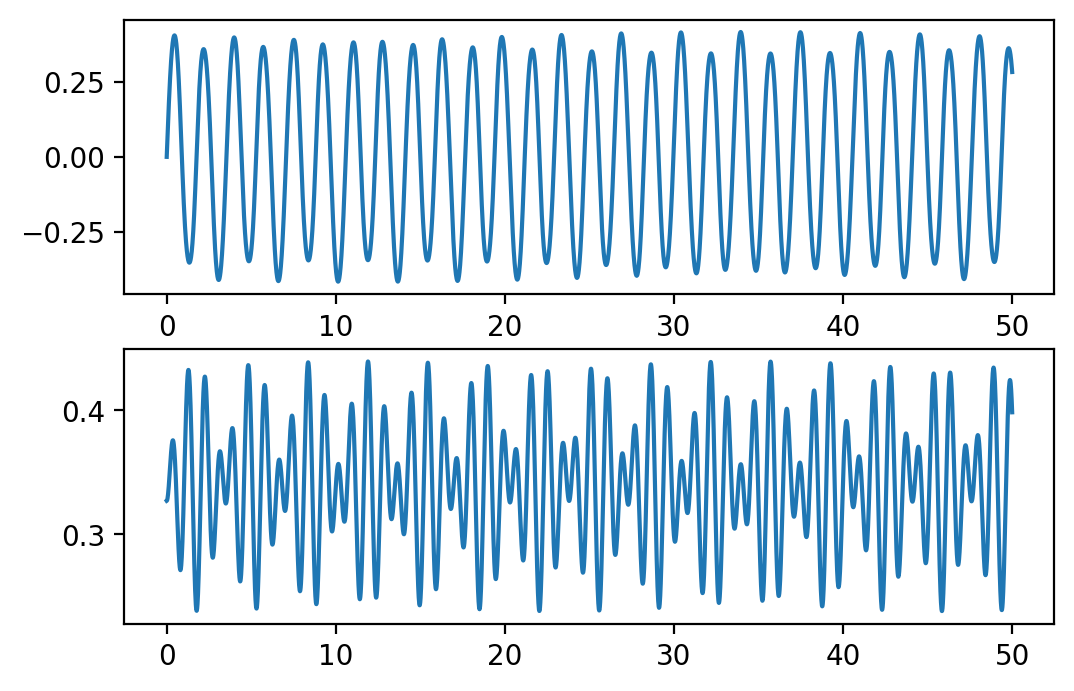

In [40]:
fig, ax = plt.subplots(nrows=2, dpi=200)
ax[0].plot(time, solution[:, 0]);
ax[1].plot(time, solution[:, 1]);

In [41]:
energy = evaluate_functional(x, H, solution, params=params)
energy.max() - energy.min()

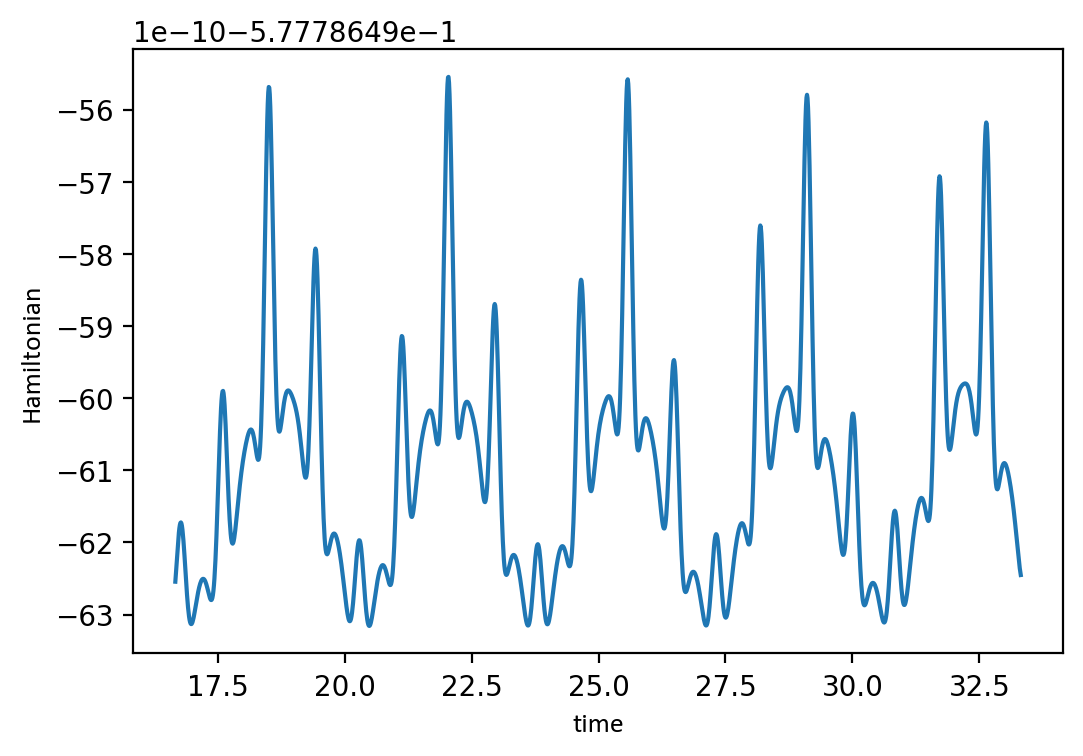

In [42]:
K = int(len(time) / 3)
font = {'fontname':'Calibri'}
fig, ax = plt.subplots(dpi=200)
ax.set_xlabel("time", **font)
ax.set_ylabel("Hamiltonian", **font)
ax.plot(time[K:2*K], energy[K:2*K]);
fig.savefig("discrete_energy_conservation.pdf")

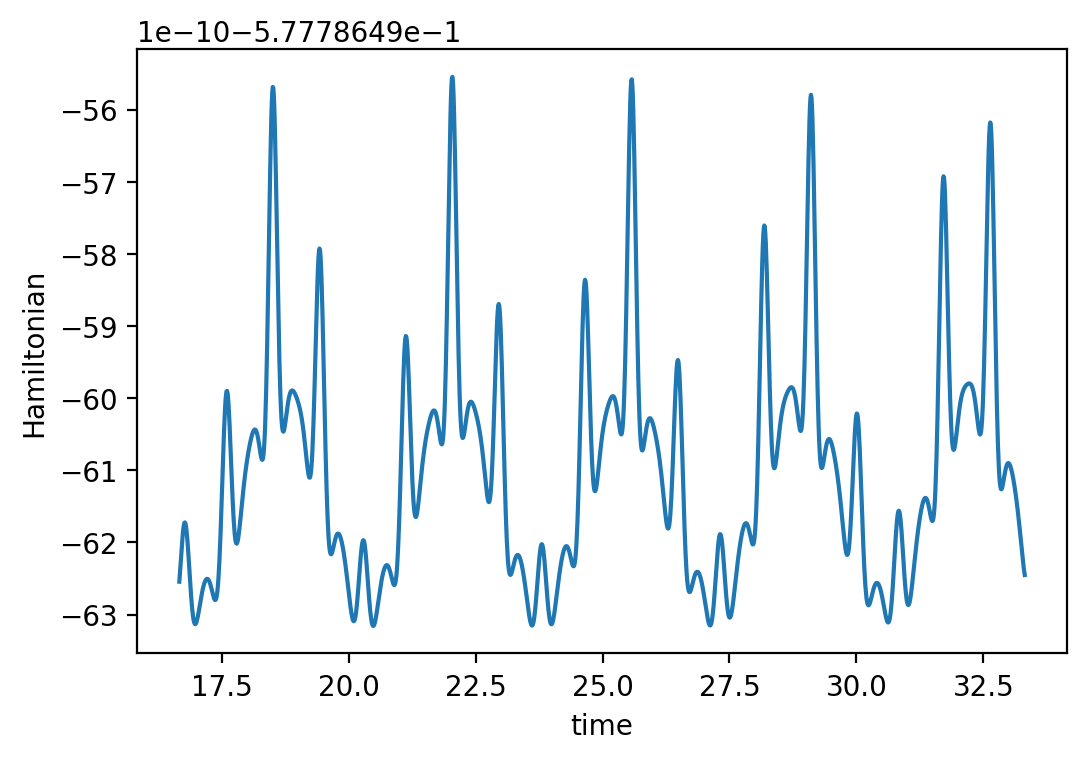

In [39]:
K = int(len(time) / 3)
fig, ax = plt.subplots(dpi=200)
ax.set_xlabel("time")
ax.set_ylabel("Hamiltonian")
ax.plot(time[K:2*K], energy[K:2*K]);
fig.savefig("discrete_energy_conservation.pdf")